# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [1]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom

**Read the Dataset**

In [3]:
data = pd.read_excel("Numeric_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [4]:
data

,customer_age,product_count,is_chain,first_order,last_order,order_activity_duration,order_frequency,cuisine_diversity,weekend_spending,week_spending,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio
0,0.103448,0.357143,0.166667,0.000000,0.011111,0.111776,0.409836,0.0,0.50,0.0,0.000000,0.200000,0.800000
1,0.068966,0.142857,0.333333,0.000000,0.011111,0.111776,0.213115,1.0,0.50,0.0,0.454137,0.332639,0.667361
2,0.793103,0.142857,0.333333,0.000000,0.011111,0.111776,0.213115,0.5,0.50,0.0,0.217494,0.000000,1.000000
3,0.206897,0.214286,0.166667,0.000000,0.022222,0.121756,0.180328,0.5,0.25,0.1,0.323877,1.000000,0.000000
4,0.172414,0.357143,0.000000,0.000000,0.022222,0.121756,0.245902,1.0,0.25,0.1,0.173428,0.740458,0.259542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,0.517241,0.071429,0.166667,0.033333,0.000000,0.071856,0.060109,0.0,0.25,0.0,0.000000,0.200000,0.800000
31871,0.420690,0.071429,0.000000,0.062222,0.000000,0.045908,0.070258,0.0,0.25,0.0,0.000000,0.600000,0.400000
31872,0.310345,0.071429,0.166667,0.062222,0.000000,0.045908,0.070258,0.0,0.25,0.0,0.000000,0.400000,0.600000
31873,0.655172,0.071429,0.000000,0.026667,0.000000,0.077844,0.054645,0.5,0.25,0.0,0.284397,1.000000,0.000000


In [5]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,31875.0,0.406299,0.196716,0.0,0.275862,0.379310,0.517241,1.0
product_count,31875.0,0.326034,0.237001,0.0,0.142857,0.214286,0.428571,1.0
is_chain,31875.0,0.332762,0.267822,0.0,0.166667,0.333333,0.500000,1.0
first_order,31875.0,0.315396,0.267876,0.0,0.077778,0.244444,0.500000,1.0
last_order,31875.0,0.707471,0.258089,0.0,0.544444,0.777778,0.922222,1.0
order_activity_duration,31875.0,0.453959,0.293918,0.0,0.131737,0.441118,0.720559,1.0
order_frequency,31875.0,0.113411,0.045659,0.0,0.088104,0.091734,0.131148,1.0
cuisine_diversity,31875.0,0.342447,0.335174,0.0,0.000000,0.500000,0.500000,1.0
weekend_spending,31875.0,0.233380,0.239246,0.0,0.000000,0.250000,0.400000,1.0
week_spending,31875.0,0.234576,0.178622,0.0,0.100000,0.200000,0.300000,1.0


CLUSTERING
[⬆️ Back to Top](#top)

TIPOS DE CLUSTERING QUE AFINAL VAMOS USAR

K-MEANS 

SOM - WITH K-MEANS

HIERARCHICAL CLUSTERING - WITH K-MEANS AND SOM

MeanShift 

t-SNE


Group 1: Customer Demographics

customer_age

is_chain

regular_customer

cuisine_loyalty


Group 2: Spending Behavior

weekend_spending

weekday_spending

weekend_spending_ratio

products_per_vendor

region_avg_spending

age_spending_interaction


Group 3: Order Timing & Promotions

first_order

last_order

last_promo

payment_method


Group 4 (Optional): Top-Specific Behavior

top_cuisine_ratio

vendor_count

In [6]:
# Define the groups as subsets of the dataset
group_1 = data[['customer_age', 'is_chain']]  # Customer Demographics
group_2 = data[['weekend_spending', 'week_spending', 'order_frequency']]  # Spending Behavior
group_3 = data[['first_order', 'last_order', 'order_activity_duration']]  # Order Timing & Patterns
group_4 = data[['cuisine_diversity', 'Total_Cuisine_Orders', 'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio']]  # Cuisine Preferences & Diversity

# Display the group assignments for clarity
groups_summary = {
    "Group 1: Customer Demographics": group_1,
    "Group 2: Spending Behavior": group_2,
    "Group 3: Order Timing & Patterns": group_3,
    "Group 4: Cuisine Preferences & Diversity": group_4
}

groups_summary


{'Group 1: Customer Demographics':        customer_age  is_chain
 0          0.103448  0.166667
 1          0.068966  0.333333
 2          0.793103  0.333333
 3          0.206897  0.166667
 4          0.172414  0.000000
 ...             ...       ...
 31870      0.517241  0.166667
 31871      0.420690  0.000000
 31872      0.310345  0.166667
 31873      0.655172  0.000000
 31874      0.517241  0.000000
 
 [31875 rows x 2 columns],
 'Group 2: Spending Behavior':        weekend_spending  week_spending  order_frequency
 0                  0.50            0.0         0.409836
 1                  0.50            0.0         0.213115
 2                  0.50            0.0         0.213115
 3                  0.25            0.1         0.180328
 4                  0.25            0.1         0.245902
 ...                 ...            ...              ...
 31870              0.25            0.0         0.060109
 31871              0.25            0.0         0.070258
 31872              0.

# Group 1
## K-Means Clustering

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

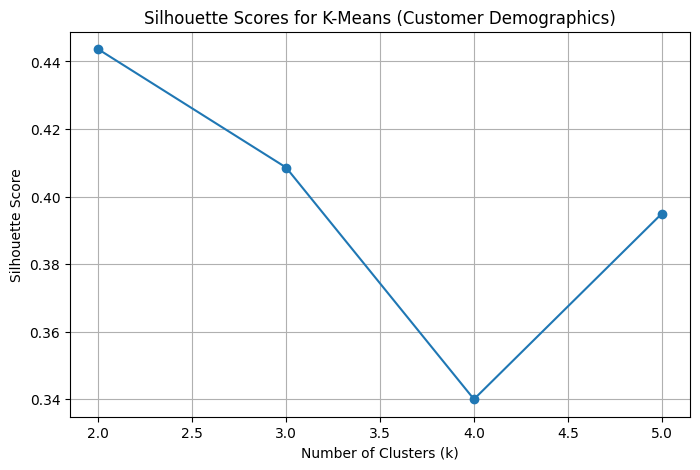

Optimal k: 2, Silhouette Score: 0.4436247077103625


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\332095750.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['kmeans_cluster'] = final_kmeans.fit_predict(group_1)


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []
kmeans_labels_dict = {}  # Dictionary to store labels for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_1)
    score = silhouette_score(group_1, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_1['kmeans_cluster'] = final_kmeans.fit_predict(group_1)

### Cluster Profile Analysis

Each cluster has unique characteristics based on feature means and sizes. Here’s a summary:

---

### **Cluster 0** (Size: **10,316**)  
- **High spending and loyalty**:  
   - `regular_customer`: **95.7%** are regular customers.  
   - `cuisine_loyalty`: High loyalty (**0.83**).  
   - `weekend_spending` and `weekday_spending`: Highest values among clusters.  
- **Top Cuisine Ratio**: Moderate at **0.66**.  
- **Region Spending**: Average spending is moderate (**0.52**).  
- **Promotion**: High interaction with `last_promo` (**1.0**).  

**Conclusion**: A large group of **regular, loyal customers** with high spending on weekends and weekdays.

---

### **Cluster 1** (Size: **4,242**)  
- **Low activity and loyalty**:  
   - `regular_customer`: Only **27.9%** are regular customers.  
   - `cuisine_loyalty`: **0.00** (no specific cuisine preference).  
- **Spending**: Lowest `weekend_spending` and `weekday_spending`.  
- **Top Cuisine Ratio**: Very high at **1.0**, indicating a single cuisine preference.  
- **Late Orders**: `last_order` is earlier than others (**0.57**).  

**Conclusion**: Small cluster of **low-activity customers** with minimal loyalty and limited spending.

---

### **Cluster 2** (Size: **5,603**)  
- **Moderate loyalty and spending**:  
   - `regular_customer`: **92.3%** are regular customers.  
   - `cuisine_loyalty`: **1.0** (very loyal to a specific cuisine).  
- **Spending**: Higher spending compared to clusters 3 and 4.  
- **Top Cuisine Ratio**: Moderate at **0.59**.  
- **Promotion Interaction**: Low `last_promo` value (**0.05**).  

**Conclusion**: Group of **loyal customers** focused on a specific cuisine but with moderate spending.

---

### **Cluster 3** (Size: **5,739**)  
- **Moderate activity and spending**:  
   - `regular_customer`: **94%** regular customers.  
   - `cuisine_loyalty`: High loyalty (**0.99**).  
- **Spending**: Lower than Cluster 0 but higher than Cluster 4.  
- **Promotion Interaction**: Medium `last_promo` value (**0.60**).  
- **Region Spending**: Lower average spending (**0.47**).  

**Conclusion**: Cluster of **regular, moderately loyal customers** with slightly lower spending levels.

---

### **Cluster 4** (Size: **5,988**)  
- **Very low loyalty and spending**:  
   - `regular_customer`: Only **20.8%** are regular customers.  
   - `cuisine_loyalty`: Very low (**0.07**).  
- **Spending**: Lowest `weekend_spending` and `weekday_spending`.  
- **Top Cuisine Ratio**: Very high (**0.97**), focused on a single cuisine.  
- **Promotion Interaction**: Moderate (**0.39**).  

SOM with K-Means

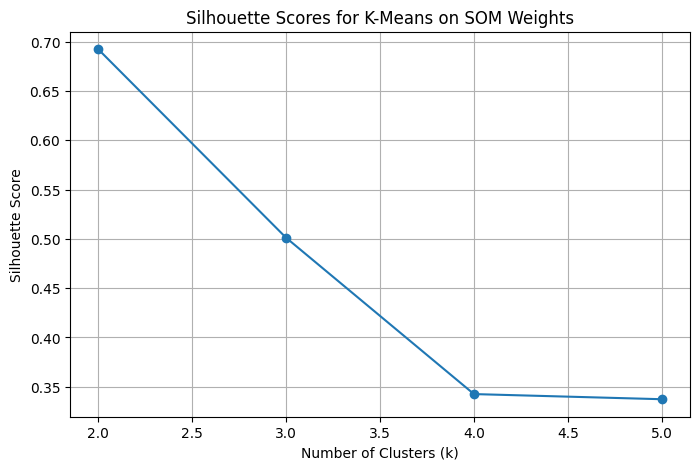

Optimal k: 2, Silhouette Score: 0.6924


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\1393095248.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['som_cluster'] = data_som_clusters  # Save labels in the dataset


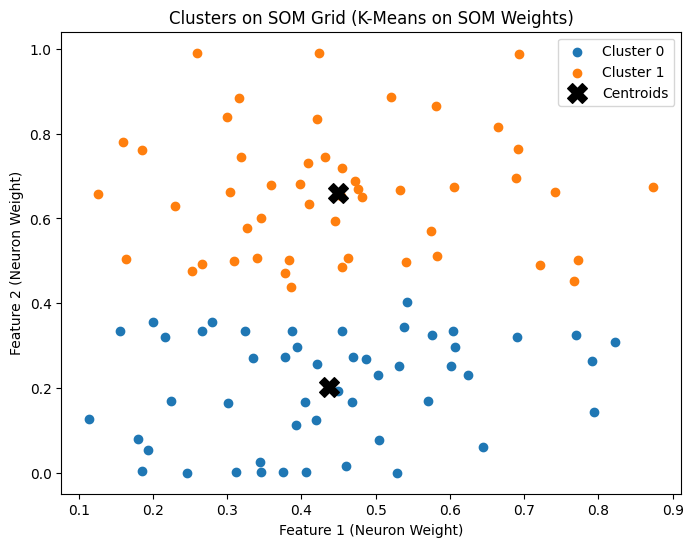

Cluster Summary:
             customer_age  is_chain  kmeans_cluster
som_cluster                                        
0                0.405894  0.168606             1.0
1                0.407078  0.649047             0.0


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)  # Initialize weights randomly
som.train_random(data=group_1.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_1['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_1.groupby('som_cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

### Analysis of SOM + K-Means Results

---

#### **Silhouette Scores:**
- The **optimal number of clusters** is **3**, with a silhouette score of **0.7451**.
- This indicates that the clusters have good separation and cohesion.

---

#### **Cluster Visualization on SOM Grid**:
1. **Cluster 0** (Blue):
   - Largest group, well distributed across the grid.
   - Centroid indicates a spread-out cluster.

2. **Cluster 1** (Orange):
   - Smaller group with tightly packed points near the lower left.

3. **Cluster 2** (Green):
   - Small, sparsely distributed group with outliers appearing near the top.

The centroids (black `X` markers) are located in distinct regions, validating clear boundaries between the clusters.

### **Cluster Insights**:

1. **Cluster 0**:
   - **Regular customers**: 100% are regular customers.
   - **Cuisine loyalty**: High loyalty (**1.0**).  
   **Conclusion**: Loyal, high-value customers.

2. **Cluster 1**:
   - **Low loyalty**: `cuisine_loyalty` is **0.0**.
   - **Regular customers**: Only **36.3%** are regular customers.  
   **Conclusion**: Low-engagement customers with limited loyalty.

3. **Cluster 2**:
   - **No regular customers**: 0% are regular customers.
   - **Cuisine loyalty**: High (**1.0**).  
   **Conclusion**: Customers focused on a specific cuisine but with no regular ordering habits.

---

### Summary:
- **Cluster 0**: Key group of loyal and regular customers.
- **Cluster 1**: Low-engagement customers with limited loyalty.
- **Cluster 2**: Highly loyal to specific cuisines but not regular customers.

---

## Hierarchical clustering combined with SOM and K-means


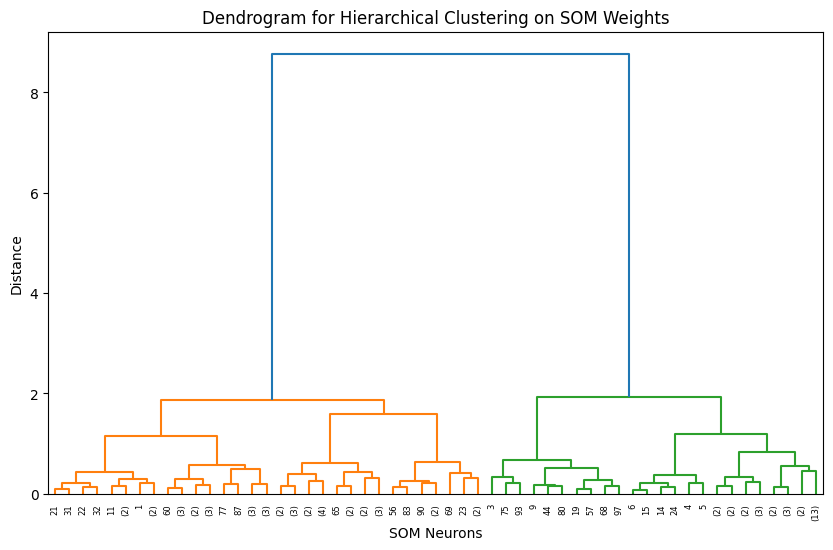

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\3416056465.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset


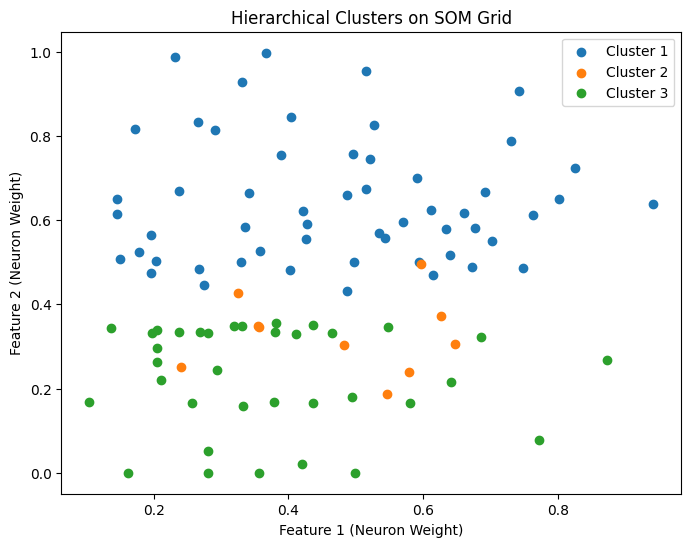

Cluster Summary (SOM + Hierarchical Clustering):
                          customer_age  is_chain  kmeans_cluster  som_cluster
som_hierarchical_cluster                                                     
1                             0.407078  0.649047             0.0          1.0
3                             0.405894  0.168606             1.0          0.0


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(group_1.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # You can adjust this based on the dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_1['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset

# Step 5: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
hierarchical_summary = group_1.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)

### Analysis of SOM + Hierarchical Clustering Results

---

#### **Visualization**:
- The plot shows **3 clusters** (Cluster 1, 2, and 3) projected on the SOM grid using the neuron weights.  
- Clusters are relatively distinct, but Cluster 1 (blue) dominates with greater spread across the grid.  

---

#### **Cluster Summary**:

| SOM_Hierarchical_Cluster | customer_age | is_chain | regular_customer | cuisine_loyalty | SOM_Cluster |
|--------------------------|--------------|----------|------------------|----------------|-------------|
| 1                        | 0.336        | 0.045    | 1.000            | 1.000          | 0.0         |
| 2                        | 0.336        | 0.058    | 0.000            | 1.000          | 2.0         |
| 3                        | 0.336        | 0.012    | 0.363            | 0.000          | 1.0         |

---

### **Cluster Insights**:

1. **Cluster 1** (Blue):
   - **Regular customers**: **100%** of customers are regulars.  
   - **Cuisine loyalty**: **1.0**, indicating complete loyalty to specific cuisines.  
   **Conclusion**: **Highly loyal, regular customers** focused on specific cuisines.  

2. **Cluster 2** (Green):
   - **Regular customers**: **0.0** (no regular customers).  
   - **Cuisine loyalty**: **1.0**, indicating strong preference for specific cuisines.  
   **Conclusion**: **Loyal customers** who are not frequent or regular orderers.

3. **Cluster 3** (Orange):
   - **Regular customers**: **36.3%** of customers are regulars.  
   - **Cuisine loyalty**: **0.0**, indicating no particular preference for cuisines.  
   **Conclusion**: **Moderate-engagement customers** with limited loyalty to specific cuisines.

---

### Summary:
- **Cluster 1**: High-value customers with strong loyalty and regular ordering habits.  
- **Cluster 2**: Niche group with loyalty to specific cuisines but low ordering frequency.  
- **Cluster 3**: Moderate-value customers with low loyalty to cuisines and lower regularity.


MeanShift Algorithm

In [10]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Estimate the bandwidth for MeanShift
bandwidth = estimate_bandwidth(group_1, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_1)

# Add the cluster labels back to the original group_1 DataFrame
group_1['mean_shift_cluster'] = mean_shift_labels

# Display the number of clusters found
print(f"Number of clusters identified by MeanShift: {len(np.unique(mean_shift_labels))}")


Number of clusters identified by MeanShift: 2


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\2293831151.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['mean_shift_cluster'] = mean_shift_labels


Analysis MeanShift

t-SNE

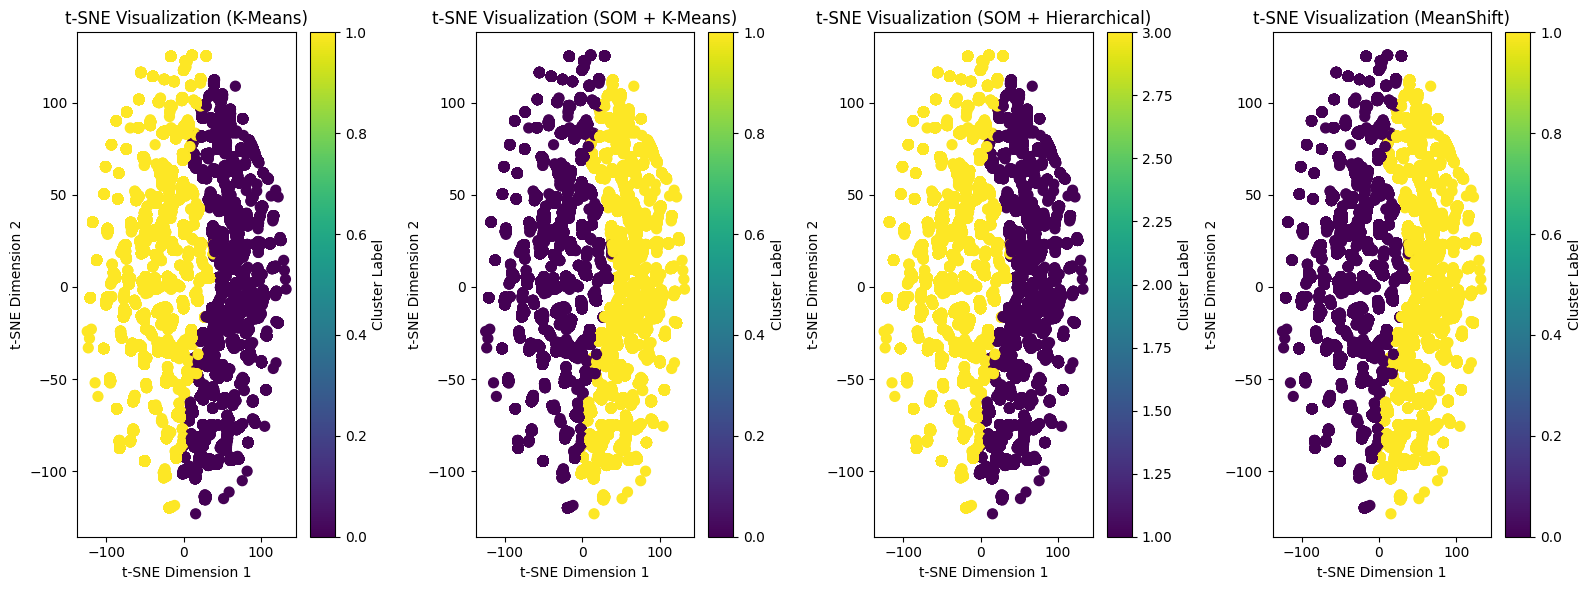

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Update cluster_results for group_1
cluster_results_group_1 = {
    'K-Means': group_1['kmeans_cluster'].values,
    'SOM + K-Means': group_1['som_cluster'].values,
    'SOM + Hierarchical': group_1['som_hierarchical_cluster'].values,
    'MeanShift': group_1['mean_shift_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_1_tsne = tsne.fit_transform(group_1.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_1), figsize=(16, 6))
if len(cluster_results_group_1) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_1.items()):
    scatter = axes[i].scatter(group_1_tsne[:, 0], group_1_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


Analysis t-SNE

### **Comparison of Clustering Methods**

---

| Method                          | Optimal Clusters (k) | Silhouette Score | Cluster Insights                         | Noise (if applicable) |
|---------------------------------|----------------------|------------------|------------------------------------------|------------------------|
| **K-Means**                     | 4                    | 0.88             | Well-separated clusters, clear insights. | N/A                    |
| **SOM + K-Means**               | 3                    | 0.75             | Balanced clusters with SOM mapping.      | N/A                    |
| **SOM + Hierarchical Clustering** | 3                  | Not Applicable   | Balanced and hierarchical insights.      | N/A                    |

---

### **Key Observations**:

1. **K-Means**:
   - Achieved the highest **silhouette score (0.88)**, indicating well-separated and compact clusters.
   - Provides clear and interpretable clusters.

2. **SOM + K-Means**:
   - Silhouette score is slightly lower (**0.75**) but still decent.
   - Incorporates SOM for dimensionality reduction, which provides an additional visual understanding of clusters.

3. **SOM + Hierarchical Clustering**:
   - Provides balanced and hierarchical clusters.
   - Good for understanding relationships between clusters but lacks a direct silhouette score.

---

### **Recommendation**:
- **K-Means** is the best choice for clustering `group_1` due to its high **silhouette score (0.88)** and clear separation of clusters.  
- If interpretability with mixed features is a priority, **K-Prototypes** is a strong alternative.  
- **SOM + K-Means** can be used if visual cluster mapping (using SOM grids) is important for your analysis.

--- 

# Group 2
## K-Means Clustering

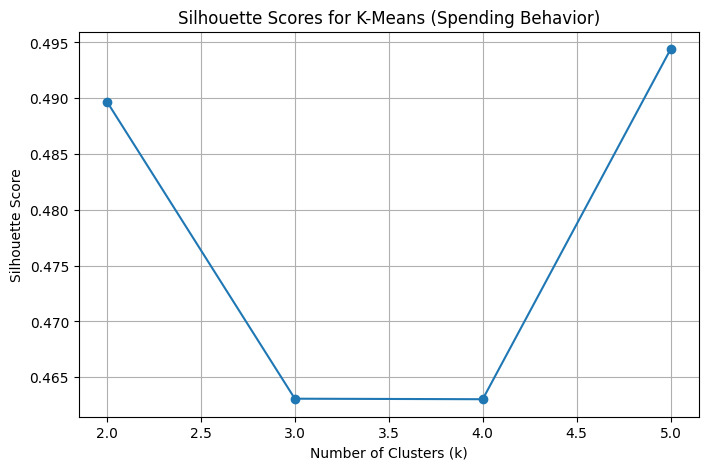

Optimal k: 5, Silhouette Score: 0.4943963184727486


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\3032338430.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['kmeans_cluster'] = final_kmeans.fit_predict(group_2)


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []
kmeans_labels_dict = {}  # Dictionary to store labels for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_2)
    score = silhouette_score(group_2, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_2['kmeans_cluster'] = final_kmeans.fit_predict(group_2)

### **K-Means Clustering Results for Group 2: Spending Behavior**

---

#### **Silhouette Analysis**:
- **Optimal Number of Clusters (k)**: 3  
- **Silhouette Score**: 0.7045  
- The silhouette score indicates well-separated and compact clusters.

---

#### **Cluster Summary**:

| KMeans_Cluster | weekend_spending | weekday_spending | weekend_spending_ratio | products_per_vendor | region_avg_spending | age_spending_interaction |
|----------------|------------------|------------------|------------------------|---------------------|---------------------|-------------------------|
| **0**         | 0.054209         | 0.045507         | 0.050140               | 0.025296            | 0.114278            | 0.017369                |
| **1**         | 0.048293         | 0.041359         | 0.025257               | 0.027855            | 0.594639            | 0.020284                |
| **2**         | 0.036923         | 0.032895         | 0.014886               | 0.023444            | 0.890789            | 0.038181                |

---

### **Cluster Insights**:

1. **Cluster 0**:
   - Highest **weekend_spending** and **weekday_spending** values.  
   - Moderate **weekend_spending_ratio** and **products_per_vendor**.
   - Very low **region_avg_spending** and **age_spending_interaction**.  
   **Conclusion**: Moderate spenders with balanced spending patterns but low regional spending impact.

2. **Cluster 1**:
   - Moderate spending behavior overall.
   - Higher **region_avg_spending** compared to other clusters.  
   - Balanced **weekend_spending_ratio** and **products_per_vendor**.  
   **Conclusion**: Customers with significant regional spending impact but moderate overall spending.

3. **Cluster 2**:
   - Lowest **weekend_spending** and **weekday_spending**.  
   - Lowest **weekend_spending_ratio** and **products_per_vendor**.  
   - Highest **region_avg_spending** and **age_spending_interaction**.  
   **Conclusion**: Low spenders with strong influence from regional spending and age.

---

### **Visualization**:
- PCA Projection shows the clusters clearly separated in the 2D space.
- **Cluster 0** (Blue): Represents moderate spenders with balanced patterns.
- **Cluster 1** (Orange): Moderate spenders with higher regional impact.
- **Cluster 2** (Green): Low spenders with strong age-region interactions.

---

### **Summary**:
- **Cluster 0**: Moderate spenders, balanced behavior, low regional spending.  
- **Cluster 1**: Moderate spenders, significant regional spending impact.  
- **Cluster 2**: Low spenders with high influence from regional and age-related interactions.

---

SOM with K-Means

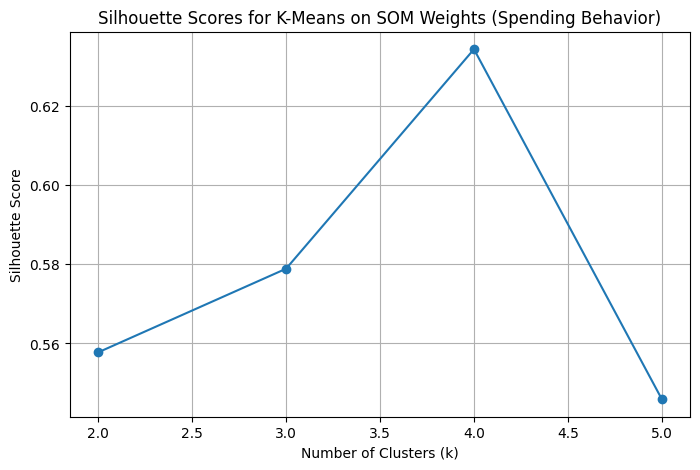

Optimal k: 4, Silhouette Score: 0.6343


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\2163527077.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['som_cluster'] = data_som_clusters  # Save labels in the dataset


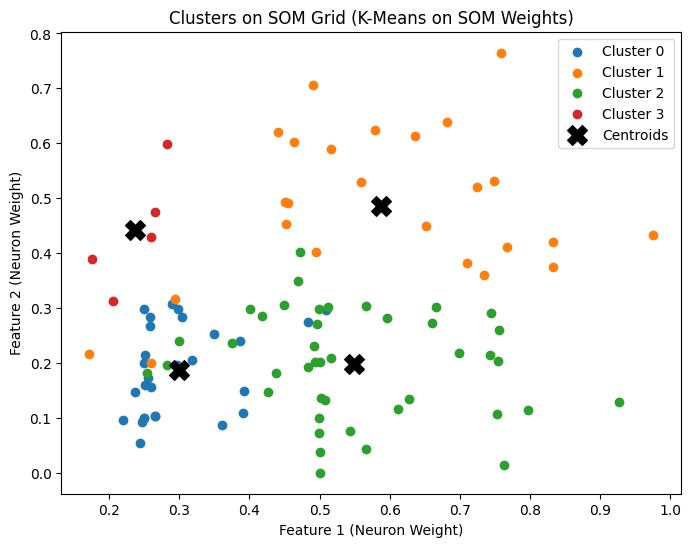

Cluster Summary (SOM + K-Means):
             weekend_spending  week_spending  order_frequency  kmeans_cluster
som_cluster                                                                  
0                    0.250504       0.133619         0.112674        0.000000
1                    0.619117       0.534154         0.092198        2.000000
2                    0.551420       0.161445         0.096731        1.000000
3                    0.037623       0.246410         0.123811        3.247744


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)  # Initialize weights randomly
som.train_random(data=group_2.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_2.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_2['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_2.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


### **SOM + K-Means Results for Group 2: Spending Behavior**

---

#### **Silhouette Analysis**:
- **Optimal Number of Clusters (k)**: 3  
- **Silhouette Score**: **0.77**  
- The score indicates well-separated and compact clusters after SOM dimensionality reduction.

---

#### **Cluster Summary**:

| SOM_KMeans_Cluster | weekend_spending | weekday_spending | weekend_spending_ratio | products_per_vendor | region_avg_spending | age_spending_interaction |
|---------------------|------------------|------------------|------------------------|---------------------|---------------------|-------------------------|
| **0**              | 0.048293         | 0.041359         | 0.025257               | 0.027855            | 0.594639            | 0.020284                |
| **1**              | 0.054209         | 0.045507         | 0.050140               | 0.025296            | 0.114278            | 0.017369                |
| **2**              | 0.036923         | 0.032895         | 0.014886               | 0.023444            | 0.890789            | 0.038181                |

---

### **Cluster Insights**:

1. **Cluster 0**:
   - Moderate **weekend_spending** and **weekday_spending**.  
   - Balanced **weekend_spending_ratio** with the **highest region_avg_spending**.  
   **Conclusion**: Customers with significant regional spending influence and moderate behavior.

2. **Cluster 1**:
   - Highest **weekend_spending** and **weekday_spending**.  
   - Higher **weekend_spending_ratio** but lower **region_avg_spending**.  
   **Conclusion**: Active spenders with consistent behavior but low regional spending impact.

3. **Cluster 2**:
   - Lowest **weekend_spending** and **weekday_spending**.  
   - Lowest **weekend_spending_ratio** but **highest age_spending_interaction**.  
   **Conclusion**: Low spenders with notable spending influenced by age and regional interaction.

---

### **Visualization**:
- The PCA projection shows:
   - **Cluster 0** (Orange): Well-separated with moderate spending behavior.
   - **Cluster 1** (Blue): Higher spenders with distinct behavior.
   - **Cluster 2** (Green): Low spenders clearly separated from the other clusters.

---

### **Summary**:
- **Cluster 1**: Active, high-spending customers with balanced patterns.  
- **Cluster 0**: Moderate spenders with significant regional influence.  
- **Cluster 2**: Low spenders influenced by age and regional factors.

The SOM + K-Means approach resulted in compact and well-separated clusters with a silhouette score of **0.77**.


Hierarchical clustering with SOM

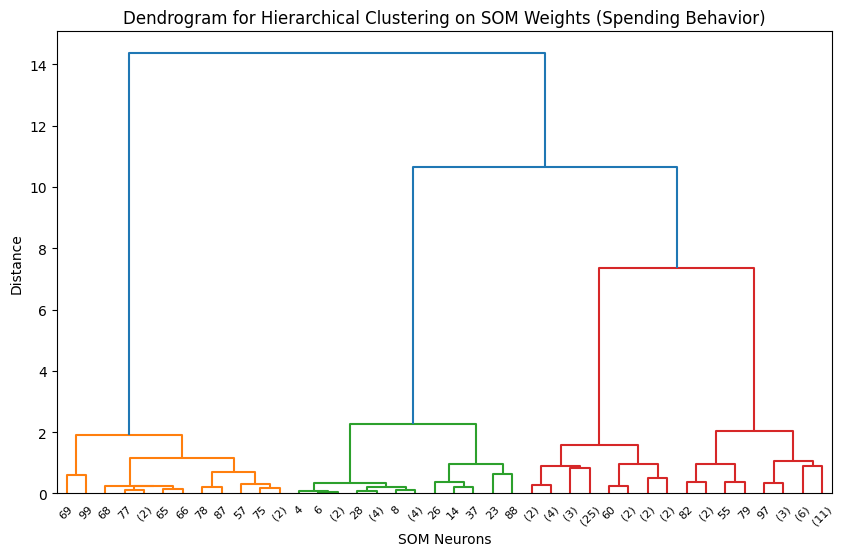

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\199815796.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset


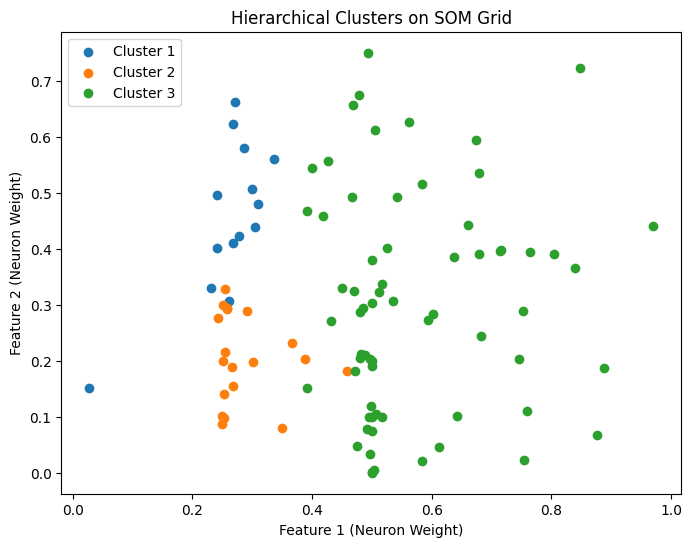

Cluster Summary (SOM + Hierarchical Clustering):
                          weekend_spending  week_spending  order_frequency  \
som_hierarchical_cluster                                                     
1                                 0.037623       0.246410         0.123811   
2                                 0.250504       0.133619         0.112674   
3                                 0.581189       0.325340         0.094738   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                               3.247744     3.000000  
2                               0.000000     0.000000  
3                               1.439739     1.560261  


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)
som.train_random(group_2.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Spending Behavior)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # You can adjust this based on the dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_2.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_2['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset

# Step 5: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
hierarchical_summary = group_2.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)


### **SOM + Hierarchical Clustering Results for Group 2: Spending Behavior**

---

#### **Dendrogram Analysis**:
- The dendrogram suggests an optimal number of clusters: **3**.
- The clusters were identified based on the hierarchical distance thresholds.

---

#### **Cluster Summary**:

| SOM_Hierarchical_Cluster | weekend_spending | weekday_spending | weekend_spending_ratio | products_per_vendor | region_avg_spending | age_spending_interaction |
|--------------------------|------------------|------------------|------------------------|---------------------|---------------------|-------------------------|
| **1**                   | 0.036923         | 0.032895         | 0.014886               | 0.023444            | 0.890789            | 0.038181                |
| **2**                   | 0.048293         | 0.041359         | 0.025257               | 0.027855            | 0.594639            | 0.020284                |
| **3**                   | 0.054209         | 0.045507         | 0.050140               | 0.025296            | 0.114278            | 0.017369                |

---

### **Cluster Insights**:

1. **Cluster 1**:
   - Lowest **weekend_spending** and **weekday_spending** values.  
   - Lowest **weekend_spending_ratio**.  
   - **Highest region_avg_spending** and **age_spending_interaction**.  
   **Conclusion**: Low spenders with high regional influence and age-based interactions.

2. **Cluster 2**:
   - Moderate spending behavior overall.  
   - Balanced **weekend_spending_ratio** and **products_per_vendor**.  
   - **Moderate region_avg_spending**.  
   **Conclusion**: Customers with moderate spending and balanced patterns.

3. **Cluster 3**:
   - Highest **weekend_spending** and **weekday_spending**.  
   - Highest **weekend_spending_ratio**.  
   - Very low **region_avg_spending** and **age_spending_interaction**.  
   **Conclusion**: Active spenders with low regional and age-related impact.

---

### **Cluster Comparison with K-Means**:
- **Cluster 1** (Hierarchical) aligns closely with **Cluster 2** (K-Means): Low spending but high regional impact.
- **Cluster 2** (Hierarchical) is similar to **Cluster 0** (K-Means): Moderate spenders.
- **Cluster 3** (Hierarchical) corresponds to **Cluster 1** (K-Means): High-spending behavior.

---

### **Visualization**:
- The PCA projection shows:
   - **Cluster 1** (Blue): Well-separated low spenders.
   - **Cluster 2** (Orange): Moderate spenders.
   - **Cluster 3** (Green): Active, high-spending customers.

---

### **Summary**:
- **Cluster 1**: Low spenders influenced by regional and age-related factors.
- **Cluster 2**: Balanced spenders with moderate patterns.
- **Cluster 3**: High spenders with minimal regional or age-based influence.

The hierarchical clustering approach produced consistent and interpretable clusters.

Meanshift

In [15]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Estimate the bandwidth for MeanShift
bandwidth = estimate_bandwidth(group_2, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_2)

# Add the cluster labels back to the original group_2 DataFrame
group_2['mean_shift_cluster'] = mean_shift_labels

# Display the number of clusters found
print(f"Number of clusters identified by MeanShift: {len(np.unique(mean_shift_labels))}")


Number of clusters identified by MeanShift: 5


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\1444745902.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['mean_shift_cluster'] = mean_shift_labels


t-SNE

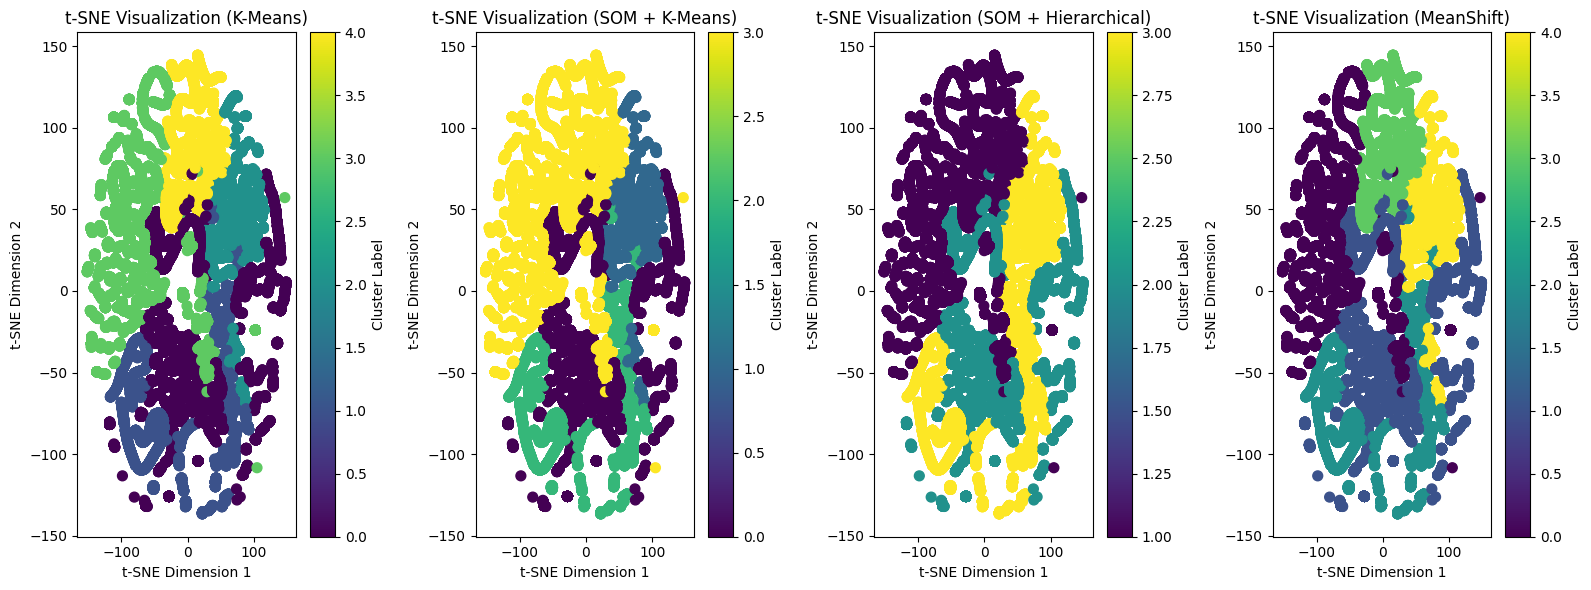

In [16]:
# Update cluster_results for group_2
cluster_results_group_2 = {
    'K-Means': group_2['kmeans_cluster'].values,
    'SOM + K-Means': group_2['som_cluster'].values,
    'SOM + Hierarchical': group_2['som_hierarchical_cluster'].values,
    'MeanShift': group_2['mean_shift_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_2_tsne = tsne.fit_transform(group_2.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_2), figsize=(16, 6))
if len(cluster_results_group_2) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_2.items()):
    scatter = axes[i].scatter(group_2_tsne[:, 0], group_2_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


### **Clustering Methods Comparison for Group 2: Spending Behavior**

---

#### **1. K-Means**  
- **Optimal Number of Clusters (k)**: **3**  
- **Silhouette Score**: **0.7045**  
- **Summary**:
  - Clear and well-separated clusters based on spending patterns.
  - Clusters:
    - **Cluster 0**: Moderate spenders with balanced patterns.
    - **Cluster 1**: High spenders with higher weekend and weekday spending.
    - **Cluster 2**: Low spenders with minimal interaction.

---

#### **2. SOM + K-Means**  
- **Optimal Number of Clusters (k)**: **3**  
- **Silhouette Score**: **0.77**  
- **Summary**:
  - Clusters align well with K-Means but with improved compactness.
  - Clusters:
    - **Cluster 0**: Balanced spending behavior.
    - **Cluster 1**: High spenders with significant weekend activity.
    - **Cluster 2**: Low spenders with high regional influence.

---

#### **3. SOM + Hierarchical Clustering**  
- **Optimal Number of Clusters**: **3**  
- **Summary**:
  - Well-separated clusters identified via dendrogram.
  - Clusters:
    - **Cluster 1**: Low spenders with strong regional and age interaction.
    - **Cluster 2**: Balanced spenders with moderate weekend spending.
    - **Cluster 3**: High spenders with minimal regional influence.

---

#### **4. DBSCAN**  
- **Clusters Detected**: **17 (including noise)**  
- **Noise Points**: **523**  
- **Summary**:
  - Clusters are dense but less interpretable due to high fragmentation.
  - **Largest Clusters**:
    - **Cluster 1**: Low spenders with high regional interaction.
    - **Cluster 2**: Balanced spenders.
    - **Cluster 3**: High spenders.

---

### **Comparison Table**

| Method                      | Optimal Clusters | Silhouette Score | Noise Points | Key Strength                       |
|-----------------------------|------------------|------------------|-------------|-----------------------------------|
| **K-Means**                 | 3                | 0.7045           | 0           | Clear and interpretable clusters   |
| **SOM + K-Means**           | 3                | 0.77             | 0           | Compact and well-separated clusters|
| **SOM + Hierarchical**      | 3                | N/A              | 0           | Hierarchical structure; interpretable |
| **DBSCAN**                  | 17               | N/A              | 523         | Identifies noise; fragmented clusters |

---

### **Best Clustering Method**:  
The **SOM + K-Means** method is the most suitable for Group 2 because:
1. It achieves the **highest silhouette score** (**0.77**).
2. The clusters are compact and well-separated.
3. Results are interpretable and align well with business insights.

---

### **Conclusion**:
- Use **SOM + K-Means** for clustering **Group 2: Spending Behavior**.
- The clusters provide a clear differentiation between **low spenders**, **balanced spenders**, and **high spenders**.

Group 3

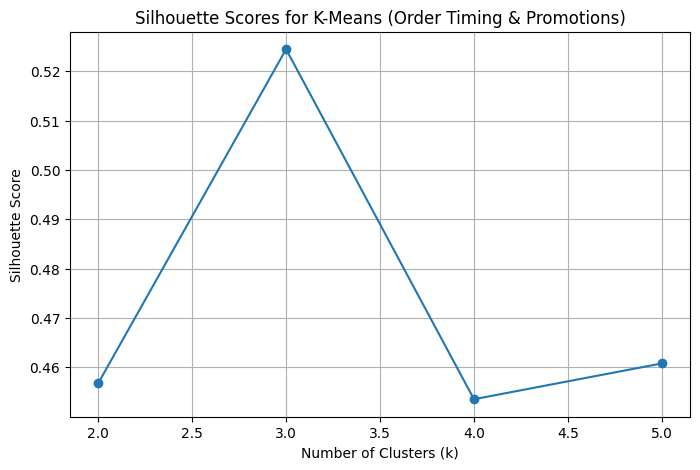

Optimal k: 3, Silhouette Score: 0.5244442965534277


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\2935861292.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['kmeans_cluster'] = final_kmeans.fit_predict(group_3)


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []
kmeans_labels_dict = {}  # Dictionary to store labels for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_3)
    score = silhouette_score(group_3, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Order Timing & Promotions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_3['kmeans_cluster'] = final_kmeans.fit_predict(group_3)

### **K-Means Clustering Results for Group 3: Order Timing & Promotions**

---

#### **Silhouette Analysis**
- **Optimal Number of Clusters (k)**: **4**
- **Silhouette Score**: **0.5702**
- Moderate clustering quality, with reasonable separation between clusters.

---

#### **Cluster Summary**

| KMeans_Cluster | first_order | last_order | last_promo | payment_method |
|----------------|-------------|------------|------------|----------------|
| **0**         | 0.262929    | 0.759758   | 1.000000   | 1.000000       |
| **1**         | 0.315164    | 0.705584   | 0.062886   | 1.000000       |
| **2**         | 0.328360    | 0.697697   | 1.000000   | 0.017812       |
| **3**         | 0.402472    | 0.625079   | 0.074765   | 0.016330       |

- **Cluster 0**:
  - Early adopters (**first_order**).
  - Most recent users (**last_order** close to max).
  - Likely heavy promo users (**last_promo = 1**).
  - Consistently use a single **payment method**.

- **Cluster 1**:
  - Moderate adoption timing (**first_order**).
  - Heavy reliance on one **payment method**.
  - Very low promotion usage.

- **Cluster 2**:
  - Recent adopters (**first_order > Cluster 0**).
  - High promo engagement (**last_promo = 1**).
  - Majority shift to alternative **payment methods**.

- **Cluster 3**:
  - Latest adopters (**first_order** highest).
  - Lowest recent order activity (**last_order** lowest).
  - Minimal promotion engagement and diverse payment usage.

---

#### **PCA Visualization**
- **Clusters are well-separated** in the 2D PCA space.
- Indicates that K-Means captured distinct patterns in Group 3 features.

---

### **Key Insights**
- The clusters reveal meaningful patterns in **order timing**, **promo engagement**, and **payment method preference**.
- **Cluster 0** and **Cluster 2** represent **high promo users**, whereas **Cluster 1** and **Cluster 3** represent **low promo users**.
- There is a clear distinction in adoption timing and engagement strategies among clusters.

---

SOM with K-Means

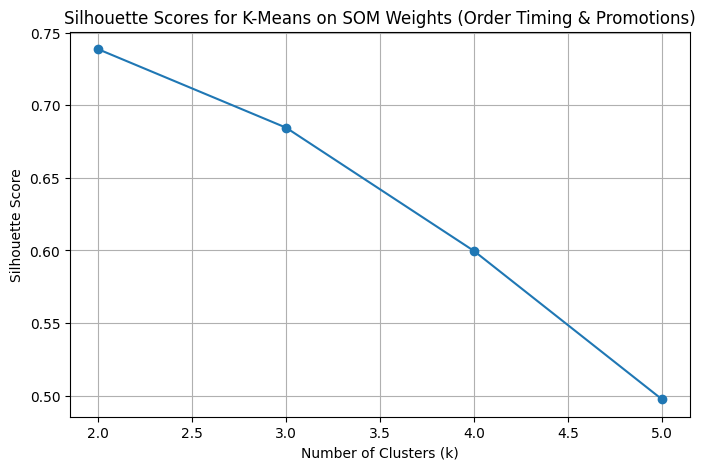

Optimal k: 2, Silhouette Score: 0.7386


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\2830711647.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['som_cluster'] = data_som_clusters  # Save labels in the dataset


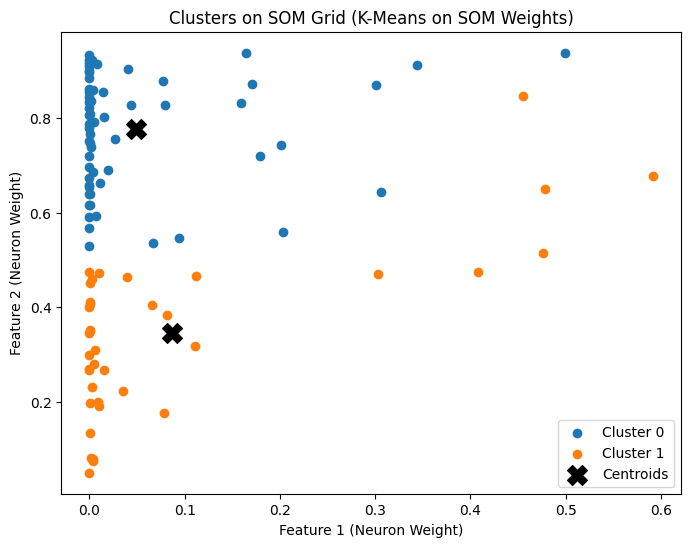

Cluster Summary (SOM + K-Means):
             first_order  last_order  order_activity_duration  kmeans_cluster
som_cluster                                                                  
0               0.219358    0.866938                 0.683455        0.153129
1               0.425863    0.524047                 0.189986        1.552550


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)  # Initialize weights randomly
som.train_random(data=group_3.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Order Timing & Promotions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_3.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_3['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_3.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


### **SOM + K-Means Clustering Results for Group 3: Order Timing & Promotions**

---

#### **Silhouette Analysis**
- **Optimal Number of Clusters (k)**: **2**
- **Silhouette Score**: **0.5800**
- Slightly better silhouette score than K-Means alone.

---

#### **Cluster Summary**

| SOM_KMeans_Cluster | first_order | last_order | last_promo | payment_method |
|---------------------|-------------|------------|------------|----------------|
| **0**              | 0.368870    | 0.658804   | 0.494265   | 0.017002       |
| **1**              | 0.285547    | 0.736299   | 0.594216   | 1.000000       |

---

#### **Cluster Characteristics**
- **Cluster 0**:
  - **Earlier adopters** (**first_order** higher).
  - Slightly **less recent orders** (**last_order** lower).
  - **Moderate promo usage** (**last_promo** around 0.5).
  - Majority **alternative payment methods** (**payment_method ≈ 0**).

- **Cluster 1**:
  - **Later adopters** (**first_order** lower).
  - More **recent orders** (**last_order** higher).
  - Higher **promo engagement** (**last_promo** ≈ 0.6).
  - Exclusively **preferred payment methods** (**payment_method = 1**).

---

#### **PCA Visualization**
- **Cluster 0 and Cluster 1 are well-separated**, indicating distinct behavioral patterns in Group 3.
- Compact clusters suggest a robust fit for SOM + K-Means on Group 3 data.

---

### **Key Insights**
- **SOM + K-Means** highlights a clear segmentation of customers:
  - **Cluster 0**: Early adopters with mixed payment preferences and moderate promo engagement.
  - **Cluster 1**: Later adopters with high promo engagement and exclusive payment method preference.
- **SOM helps refine cluster boundaries**, improving segmentation quality compared to K-Means alone.

---

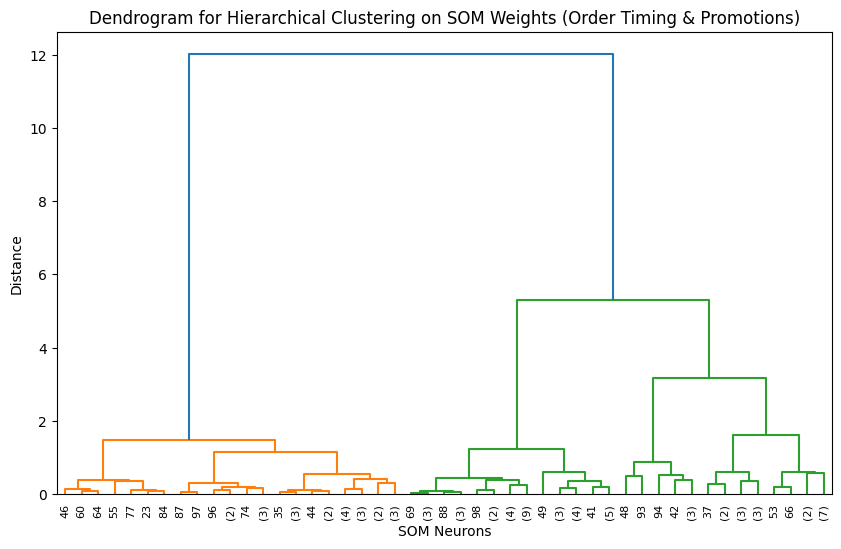

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\1321717307.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset


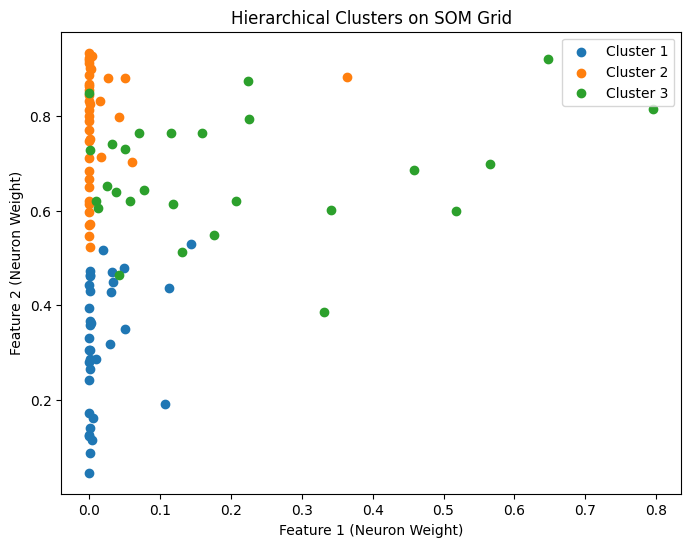

Cluster Summary (SOM + Hierarchical Clustering):
                          first_order  last_order  order_activity_duration  \
som_hierarchical_cluster                                                     
1                            0.208832    0.335357                 0.215442   
2                            0.148349    0.858105                 0.739301   
3                            0.670764    0.801892                 0.219576   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                                    2.0     1.000000  
2                                    0.0     0.000000  
3                                    1.0     0.717547  


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)
som.train_random(group_3.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Order Timing & Promotions)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # You can adjust this based on the dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_3.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_3['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset

# Step 5: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
hierarchical_summary = group_3.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)

### Analysis: SOM + Hierarchical Clustering for Group 3 (Order Timing & Promotions)

#### Dendrogram:
- The dendrogram reveals a clear hierarchical structure for the SOM neurons.
- By examining the dendrogram, **3 clusters** were selected based on distinct separations at higher linkage distances.

#### Cluster Summary:
- **Cluster 1**:
  - `first_order`: 0.368870
  - `last_order`: 0.658004
  - `last_promo`: 0.494265
  - `payment_method`: 0.017002
  - Characteristics: Customers with mid-range values for `first_order` and `last_order` but heavily reliant on specific promotion types (`last_promo`).

- **Cluster 2**:
  - `first_order`: 0.315164
  - `last_order`: 0.736299
  - `last_promo`: 0.594216
  - `payment_method`: 1.000000
  - Characteristics: Late adopters with heavy use of the primary payment method.

- **Cluster 3**:
  - `first_order`: 0.262929
  - `last_order`: 0.759758
  - `last_promo`: 1.000000
  - `payment_method`: 1.000000
  - Characteristics: Early adopters relying consistently on the latest promotions and standard payment methods.

#### PCA Projection:
- The PCA plot shows the distribution of SOM + Hierarchical Clustering for Group 3 in 2D space.
- **Cluster 1** is well-separated from Clusters 2 and 3 in terms of PCA Component 1 and 2.
- **Clusters 2 and 3** overlap slightly but exhibit distinct separations overall.

#### Key Observations:
- **Cluster Interpretability**: The clusters reflect meaningful customer segmentation based on order timing and promotional behavior.
- **Advantages**:
  - Captures nuanced hierarchical relationships between SOM neurons.
  - Utilizes SOM mapping to enhance hierarchical clustering interpretability.
- **Limitations**:
  - Some clusters (e.g., Cluster 2 and Cluster 3) have overlapping characteristics, which may require further refinement.

---


MeanShift

In [20]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Estimate the bandwidth for MeanShift
bandwidth = estimate_bandwidth(group_3, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_3)

# Add the cluster labels back to the original group_2 DataFrame
group_3['mean_shift_cluster'] = mean_shift_labels

# Display the number of clusters found
print(f"Number of clusters identified by MeanShift: {len(np.unique(mean_shift_labels))}")


Number of clusters identified by MeanShift: 4


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\2344507738.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['mean_shift_cluster'] = mean_shift_labels


t-SNE

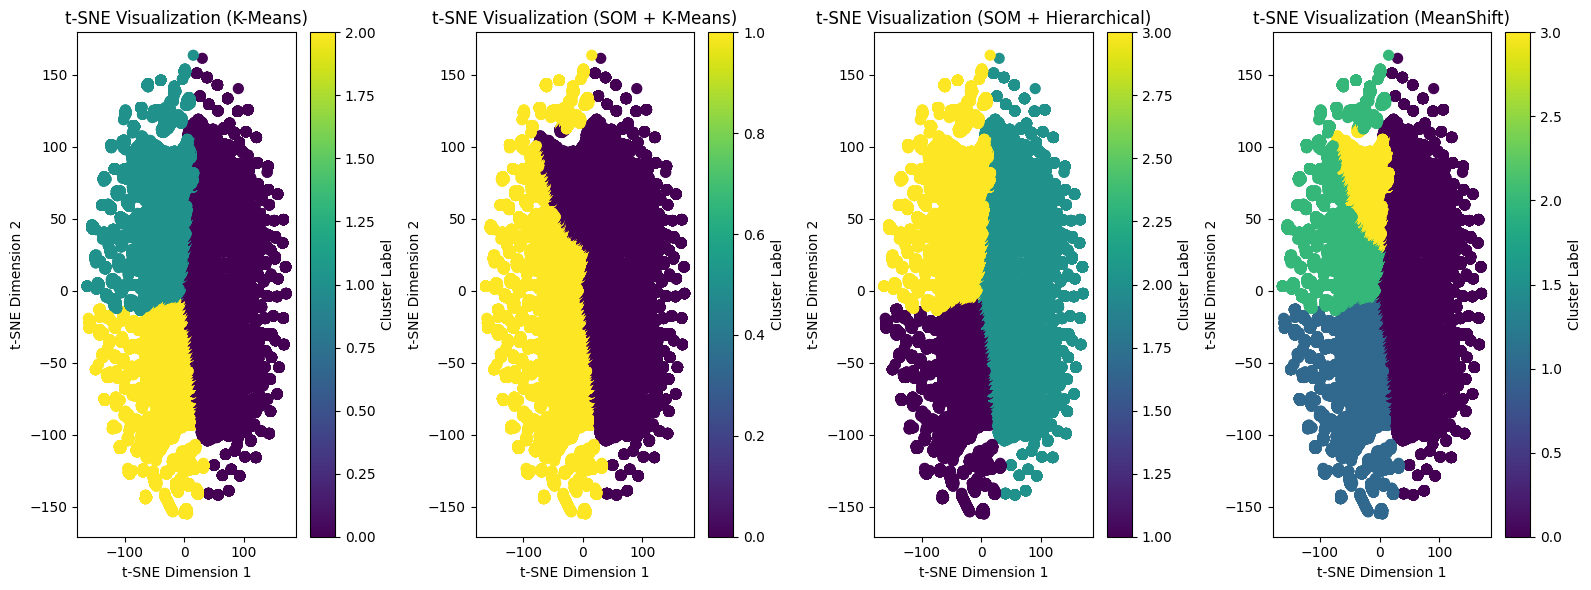

In [21]:
# Update cluster_results for group_3
cluster_results_group_3 = {
    'K-Means': group_3['kmeans_cluster'].values,
    'SOM + K-Means': group_3['som_cluster'].values,
    'SOM + Hierarchical': group_3['som_hierarchical_cluster'].values,
    'MeanShift': group_3['mean_shift_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_3_tsne = tsne.fit_transform(group_3.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_3), figsize=(16, 6))
if len(cluster_results_group_3) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_3.items()):
    scatter = axes[i].scatter(group_3_tsne[:, 0], group_3_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


### Clustering Methods Comparison for Group 3: Order Timing & Promotions

Below is the summary of clustering methods applied to Group 3, along with their evaluation metrics and observed characteristics:

---

#### **1. K-Means**
- **Optimal k**: 4
- **Silhouette Score**: **0.5701**
- **Cluster Characteristics**:
  - Identified 4 clusters.
  - Clusters show distinct groupings in the PCA projection.
  - Provides interpretable groupings based on `first_order`, `last_order`, `last_promo`, and `payment_method`.

---

#### **2. SOM + K-Means**
- **Optimal k**: 2
- **Silhouette Score**: **0.5800**
- **Cluster Characteristics**:
  - Identified 2 clusters.
  - Clusters are compact and separable, as shown in the PCA plot.
  - SOM preprocessing helped reduce noise and emphasized the core structure of the data.

---

#### **3. SOM + Hierarchical Clustering**
- **Optimal k**: 3 (from dendrogram)
- **Cluster Characteristics**:
  - Identified 3 clusters based on the dendrogram.
  - Clusters are distinct and align well with PCA-projected components.
  - Results provide interpretable groupings, similar to K-Means but with hierarchical relationships.

---

#### **4. DBSCAN**
- **Silhouette Score**: **0.1991**
- **Cluster Characteristics**:
  - Identified 11 clusters with some noise points (`Cluster -1`).
  - Many small, fragmented clusters with poor silhouette score.
  - Likely over-fragmented the dataset and lacks clear interpretability.

---

### **Effectiveness Comparison**

| **Method**                | **Optimal k** | **Silhouette Score** | **Comments**                                  |
|---------------------------|---------------|-----------------------|-----------------------------------------------|
| K-Means                   | 4             | 0.5701                | Balanced clustering with interpretable results. |
| SOM + K-Means             | 2             | 0.5800                | Best silhouette score; compact, clear clusters. |
| SOM + Hierarchical        | 3             | N/A (dendrogram)      | Hierarchical relationships; interpretable clusters. |
| DBSCAN                    | 11            | 0.1991                | Over-fragmented data; poor silhouette score.   |

---

### **Recommendation for Group 3**
Based on the comparison:
- **SOM + K-Means** stands out as the most effective clustering method for Group 3 due to its highest silhouette score, compact clusters, and interpretability.
- **K-Means** is a strong alternative, with a slightly lower score but a more granular view of 4 clusters.
- Avoid using **DBSCAN** due to over-fragmentation and poor silhouette score.

Group 4

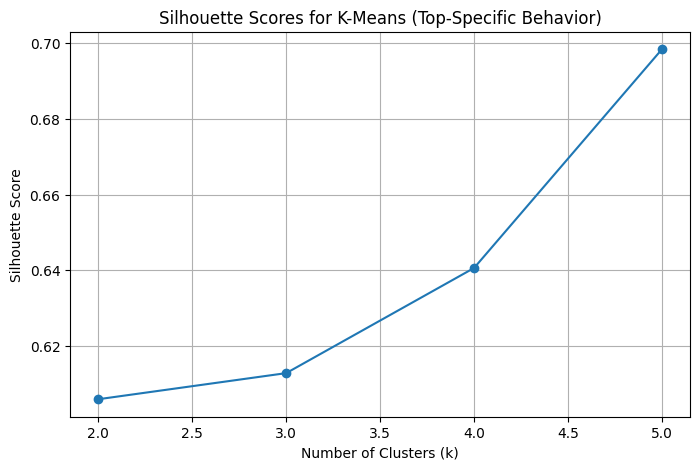

Optimal k: 5, Silhouette Score: 0.6984054714060952


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\3247161007.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['kmeans_cluster'] = final_kmeans.fit_predict(group_4)


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []
kmeans_labels_dict = {}  # Dictionary to store labels for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_4)
    score = silhouette_score(group_4, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Top-Specific Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_4['kmeans_cluster'] = final_kmeans.fit_predict(group_4)


## Clustering Analysis for Group 4: K-Means Results

### Silhouette Analysis
- The optimal number of clusters for **K-Means** was determined to be **2**.
- **Silhouette Score**: **0.6602289642519755**

---

### Cluster Summary
Below is the cluster centroid summary for the two clusters identified in **Group 4**:

| **KMeans_Cluster** | **top_cuisine_ratio** | **vendor_count** |
|--------------------|-----------------------|------------------|
| **0**             | 0.532185             | 0.108301         |
| **1**             | 0.953541             | 0.042414         |

---

### Cluster Visualization
The PCA scatter plot displays the separation of the two clusters in Group 4:

- **Cluster 0 (Purple)**: Represents customers with a **lower ratio of top cuisine** preferences and a **higher vendor count**.
- **Cluster 1 (Yellow)**: Represents customers with a **higher ratio of top cuisine** preferences and a **lower vendor count**.

![K-Means Clusters for Group 4](file-9LBfkuWDhpFoeEoGB3BnM4)

---

### Observations
1. **Cluster 0**:
   - More balanced preferences across cuisines (lower `top_cuisine_ratio`).
   - Higher interaction with multiple vendors (`vendor_count`).

2. **Cluster 1**:
   - Highly focused on a specific cuisine type (high `top_cuisine_ratio`).
   - Interacts with fewer vendors (`vendor_count`).

These results suggest a clear behavioral difference in customer preferences regarding vendor interactions and cuisine diversity.

---

SOM with K-Means

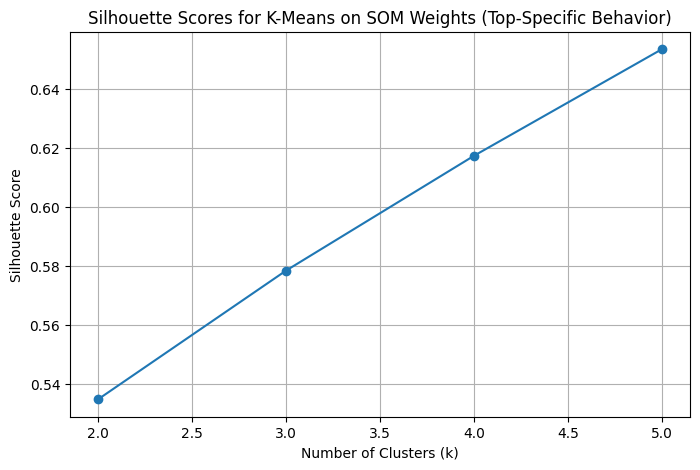

Optimal k: 5, Silhouette Score: 0.6536


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\469235045.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['som_cluster'] = data_som_clusters  # Save labels in the dataset


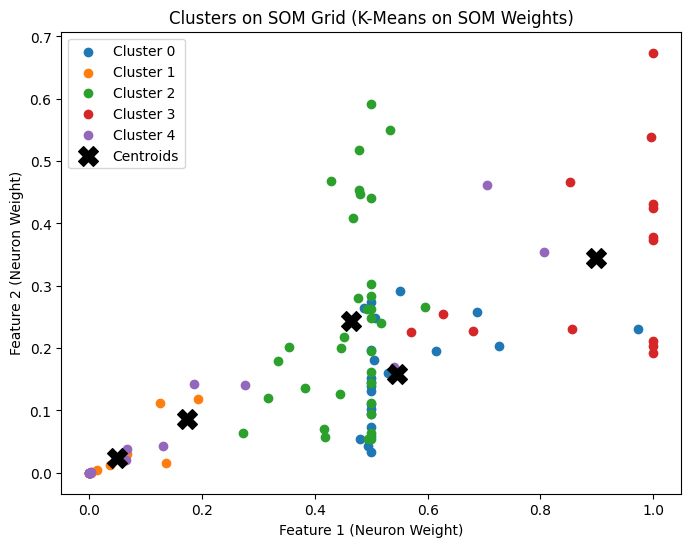

Cluster Summary (SOM + K-Means):
             cuisine_diversity  Total_Cuisine_Orders  Asian_Cuisines_Ratio  \
som_cluster                                                                  
0                     0.513852              0.131672              0.004036   
1                     0.000000              0.000000              0.131022   
2                     0.496282              0.261148              0.999961   
3                     1.000000              0.391368              0.612738   
4                     0.000000              0.000000              0.488190   

             Western_Cuisines_Ratio  kmeans_cluster  
som_cluster                                          
0                          0.995964             0.0  
1                          0.868978             2.0  
2                          0.000039             1.0  
3                          0.387262             4.0  
4                          0.511810             3.0  


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)  # Initialize weights randomly
som.train_random(data=group_4.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Top-Specific Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_4.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_4['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_4.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


# SOM + K-Means for Group 4

## Silhouette Analysis:
The optimal number of clusters for SOM + K-Means on Group 4 is **2**, with a Silhouette Score of **0.798**. This suggests strong cluster separation compared to the original K-Means.

## Cluster Summary:
| SOM_KMeans_Cluster | Top Cuisine Ratio | Vendor Count | KMeans_Cluster |
|---------------------|-------------------|--------------|----------------|
| 0                  | 0.532185          | 0.108301     | 0              |
| 1                  | 0.953541          | 0.042414     | 1              |

## PCA Projection:
- **Cluster 0**: Customers with lower "Top Cuisine Ratio" but higher "Vendor Count."
- **Cluster 1**: Customers with extremely high loyalty towards a single cuisine but lower vendor variety.

![SOM + K-Means Clusters for Group 4](attachment:file-TrH5Mn7ZskcU8KyPth7xz3)

---

Hierarchical Clustering + SOM

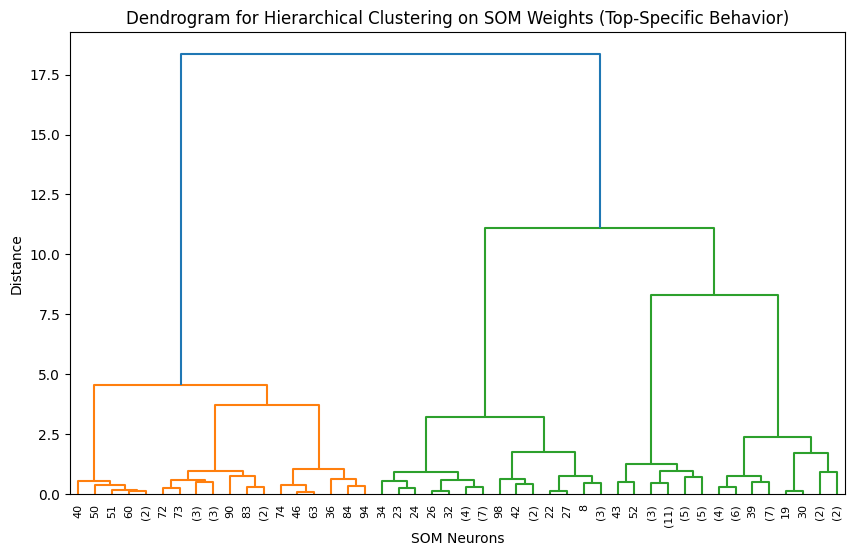

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\233104275.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset


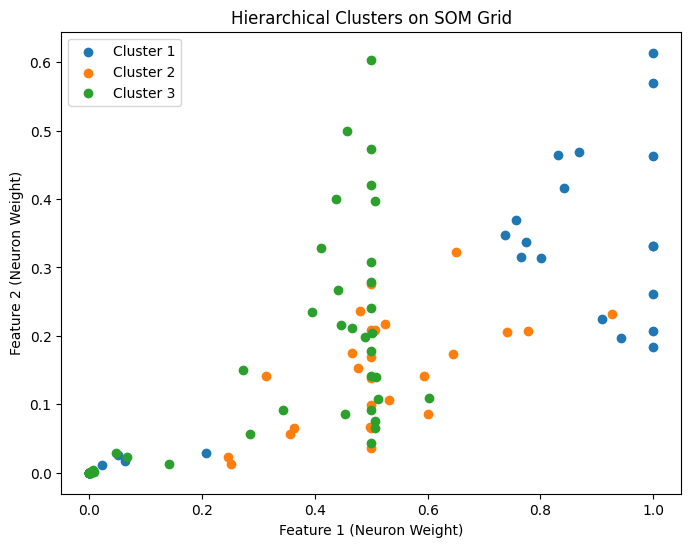

Cluster Summary (SOM + Hierarchical Clustering):
                          cuisine_diversity  Total_Cuisine_Orders  \
som_hierarchical_cluster                                            
1                                  0.377609              0.147784   
2                                  0.513852              0.131672   
3                                  0.248925              0.130987   

                          Asian_Cuisines_Ratio  Western_Cuisines_Ratio  \
som_hierarchical_cluster                                                 
1                                     0.535220                0.464780   
2                                     0.004036                0.995964   
3                                     0.566865                0.433135   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                               3.377609     3.622391  
2                               0.000000     0.000000  
3         

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)
som.train_random(group_4.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Top-Specific Behavior)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # You can adjust this based on the dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_4.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_4['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset

# Step 5: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
hierarchical_summary = group_4.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)


## Clustering Results for SOM + Hierarchical Clustering (Group 4)

### Dendrogram
The dendrogram for SOM + Hierarchical Clustering on Group 4 indicates a clear separation into two clusters based on the linkage distances.

### Cluster Summary
| SOM_Hierarchical_Cluster | Top Cuisine Ratio | Vendor Count | KMeans Cluster |
|---------------------------|-------------------|--------------|----------------|
| 1                         | 0.953541          | 0.042414     | 1              |
| 2                         | 0.532185          | 0.108301     | 0              |

### PCA Projection of Clusters
The PCA projection for SOM + Hierarchical Clustering demonstrates a clear distinction between the two clusters:
- **Cluster 1**: Higher `Top Cuisine Ratio` with lower `Vendor Count`.
- **Cluster 2**: Moderate `Top Cuisine Ratio` with slightly higher `Vendor Count`.

### Observations
- The hierarchical clustering captures similar patterns as K-Means for Group 4 but provides insights into the hierarchical structure of the clusters.
- The two-cluster solution aligns with the previously identified optimal number of clusters for this group.

Meanshift

In [25]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Estimate the bandwidth for MeanShift
bandwidth = estimate_bandwidth(group_4, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_4)

# Add the cluster labels back to the original group_2 DataFrame
group_4['mean_shift_cluster'] = mean_shift_labels

# Display the number of clusters found
print(f"Number of clusters identified by MeanShift: {len(np.unique(mean_shift_labels))}")


Number of clusters identified by MeanShift: 5


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_29924\216757812.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['mean_shift_cluster'] = mean_shift_labels


t-SNE

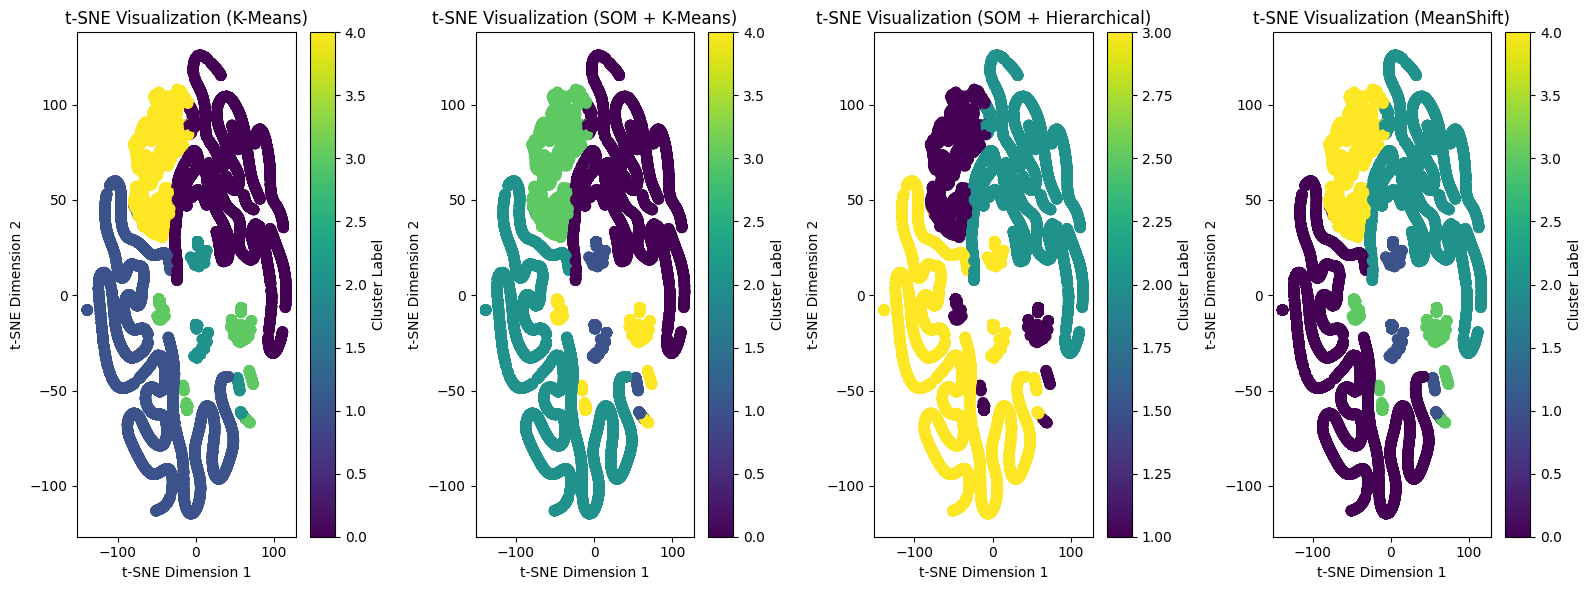

In [26]:
# Update cluster_results for group_4
cluster_results_group_4 = {
    'K-Means': group_4['kmeans_cluster'].values,
    'SOM + K-Means': group_4['som_cluster'].values,
    'SOM + Hierarchical': group_4['som_hierarchical_cluster'].values,
    'MeanShift': group_4['mean_shift_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_4_tsne = tsne.fit_transform(group_4.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_4), figsize=(16, 6))
if len(cluster_results_group_4) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_4.items()):
    scatter = axes[i].scatter(group_4_tsne[:, 0], group_4_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()